<a href="https://colab.research.google.com/github/devashishsagar/Emotion_Detection_Final_Project/blob/main/Emotion_Detection_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Applied Data Science Machine Learning & Edge AI
    (By E&ICT Academy IIT Guwahati: The Iot Academy)


#This Code is for building and training a deep learning model for **EMOTION DETECTION** using the FER (Facial Expression Recognition) dataset.

    (By Devashish Sagar)

#Package Installation:

First, it installs the necessary Python packages tensorflow and opencv-python-headless using pip. These packages are essential for working with deep learning and image processing.

In [1]:
# Install the required packages
!pip install tensorflow opencv-python-headless
!pip install tensorflow
!pip install numpy pandas matplotlib

#Import Libraries:

The code imports various Python libraries and modules required for different tasks within the script. These include libraries for data handling (numpy, pandas), data visualization (matplotlib), and deep learning (TensorFlow and its components).

In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.applications import VGG16, InceptionResNetV2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
import zipfile
import pathlib

#Kaggle API Setup:

The code ensures that the Kaggle API key is available. It creates a directory .kaggle in your home directory (if it doesn't already exist) and copies the kaggle.json file to that directory. This key is used later to download the dataset from Kaggle.

In [6]:
# Ensure Kaggle API key is available
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

#Download and Unzip Dataset:

It downloads a dataset **from Kaggle using the Kaggle API**. The dataset is specified by the dataset name emotion-detection-fer. The dataset is downloaded as a zip file and then extracted into the /content directory.

In [7]:
# Download the dataset from Kaggle
!kaggle datasets download -d ananthu017/emotion-detection-fer


# Unzip the dataset
zip_ref = zipfile.ZipFile('/content/emotion-detection-fer.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

 87% 57.0M/65.2M [00:00<00:00, 90.6MB/s]
100% 65.2M/65.2M [00:00<00:00, 83.2MB/s]


#Set up Data Directories:

Two data directories are defined: **train_dir** and **test_dir**, which point to the training and testing data, respectively.
img_size is set to 48, which is the size to which images will be resized for processing.

In [8]:
# Set up data directories
train_dir = pathlib.Path("/content/train")
test_dir = pathlib.Path("/content/test")

img_size = 48

#Data Augmentation:

**Data augmentation** is a technique to artificially increase the diversity of the training dataset by applying various transformations to the existing images. It helps improve the model's generalization.

**ImageDataGenerator** objects are created for both training and validation datasets. These generators will apply data augmentation to the images.

**Augmentation techniques** include shifting the image, horizontal flipping, and rescaling pixel values to a range between 0 and 1.


In [9]:
# Data Augmentation
train_datagen = ImageDataGenerator(
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    rescale=1./255,
    validation_split=0.2
)

validation_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

#Data Generators:

**train_generator** and **validation_generator** are created using the data generators defined earlier. These generators will provide batches of augmented images and their corresponding labels during model training.

In [10]:
# Applying data augmentation to the images as we read them from their respective directories
batch_size = 64
color_mode = "grayscale"
class_mode = "categorical"

train_generator = train_datagen.flow_from_directory(
    directory=train_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    color_mode=color_mode,
    class_mode=class_mode,
    subset="training"
)

validation_generator = validation_datagen.flow_from_directory(
    directory=test_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    color_mode=color_mode,
    class_mode=class_mode,
    subset="validation"
)

Found 22968 images belonging to 7 classes.
Found 1432 images belonging to 7 classes.


#Model Architecture:

A **convolutional neural network (CNN)** model is defined using the Sequential API from TensorFlow/Keras.
The model consists of several layers of convolution, pooling, batch normalization, dropout, and fully connected layers.
These layers are used to extract features from the input images and make predictions about the emotions depicted in the images.
The final layer has 7 units with softmax activation, which corresponds to 7 different emotion classes.

In [11]:
# Modeling
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(48, 48, 1)))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (5, 5), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(512, (3, 3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(512, (3, 3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(7, activation='softmax'))

#Model Compilation:

The model is compiled with an **optimizer (Adam)**, loss function (categorical cross-entropy), and evaluation metric (accuracy). This prepares the model for training.

In [12]:
model.compile(
    optimizer=Adam(lr=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

#Model Training:

The model is trained using the fit method. It is trained on the training data (train_generator) and validated on the validation data (validation_generator) for a specified number of epochs (60 in this case).

In [13]:
# Model Training
epochs = 60

history = model.fit(
    x=train_generator,
    epochs=epochs,
    validation_data=validation_generator
)

Epoch 1/60
359/359 [==============================] - 51s 89ms/step - loss: 5.3497 - accuracy: 0.2346 - val_loss: 2.8506 - val_accuracy: 0.2647
Epoch 2/60
359/359 [==============================] - 25s 70ms/step - loss: 2.3998 - accuracy: 0.3402 - val_loss: 2.3616 - val_accuracy: 0.3757
Epoch 3/60
359/359 [==============================] - 25s 68ms/step - loss: 2.2829 - accuracy: 0.4049 - val_loss: 2.5056 - val_accuracy: 0.3939
Epoch 4/60
359/359 [==============================] - 25s 69ms/step - loss: 2.2563 - accuracy: 0.4525 - val_loss: 2.1585 - val_accuracy: 0.4609
Epoch 5/60
359/359 [==============================] - 24s 67ms/step - loss: 2.1727 - accuracy: 0.4797 - val_loss: 2.0979 - val_accuracy: 0.5161
Epoch 6/60
359/359 [==============================] - 25s 70ms/step - loss: 2.1313 - accuracy: 0.4913 - val_loss: 2.1718 - val_accuracy: 0.4588
Epoch 7/60
359/359 [==============================] - 25s 69ms/step - loss: 2.1153 - accuracy: 0.4953 - val_loss: 2.0919 - val_accuracy:

#Plot Training History:

After training, the code plots two graphs showing the training and validation accuracy and loss over epochs. These graphs help visualize how well the model is learning.

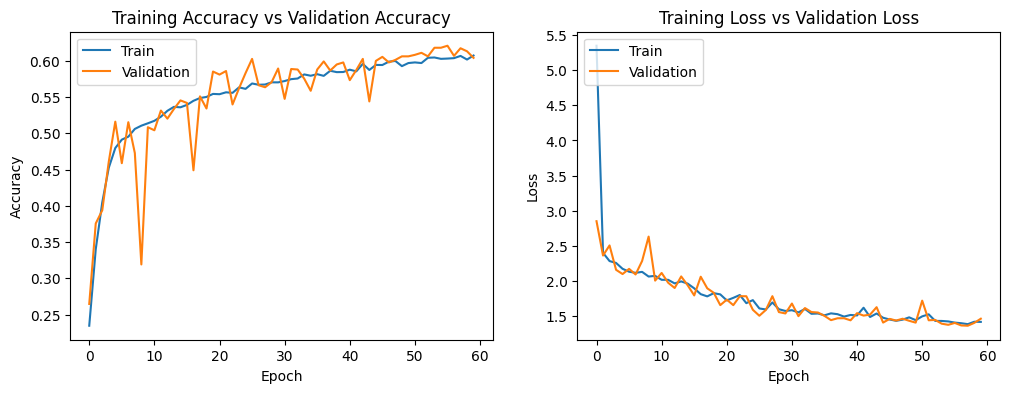

In [14]:
# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Training Accuracy vs Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Training Loss vs Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

plt.show()

#Load and Predict on a Sample Image:

The code loads a sample image from the test directory, converts it to grayscale, and resizes it to 48x48 pixels.
It then preprocesses the image for model prediction.
The model predicts the emotion in the image and prints the corresponding emotion label.

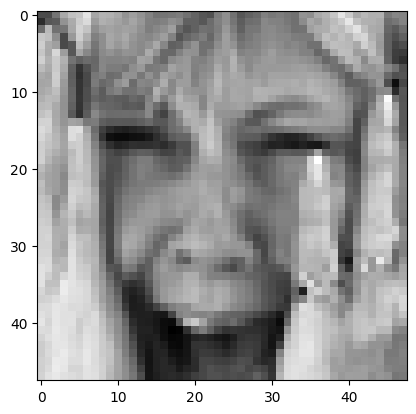

(48, 48)
1/1 [==============================] - 0s 23ms/step
Fear


In [45]:
# Load and Predict on a Sample Image
from PIL import Image

img = Image.open("/content/test/fearful/im0.png").convert("L")
img = img.resize((48, 48))
img_array = np.array(img)

plt.imshow(img_array, cmap='gray')
plt.show()

print(img_array.shape)

label_dict = {0: 'Angry', 1: 'Disgust', 2: 'Fear', 3: 'Happy', 4: 'Neutral', 5: 'Sad', 6: 'Surprise'}

img = np.expand_dims(img, axis=0)
img = img.reshape(1, 48, 48, 1)
result = model.predict(img)
result = list(result[0])

img_index = result.index(max(result))
print(label_dict[img_index])

#Save Model Weights:

Finally, the model weights are saved to a file named **'final_project_emotion_detection.h5'**. These weights can be loaded later to make predictions without retraining the model.

In [46]:
# Save model weights
model.save_weights('final_project_emotion_detection.h5')

In summary, this code downloads a dataset, performs data augmentation, builds a deep learning model for emotion detection, trains the model, evaluates its performance, and saves the trained model for future use.

**Note** : You can access this code from here https://colab.research.google.com/drive/1TE1Du_BzkW9ZveY7fGNxQDiKNiiB75R-?usp=sharing